# MÜŞTERİ SEGMENTASYONU PROJESİ




In [2]:
import numpy
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


# görselleştirme

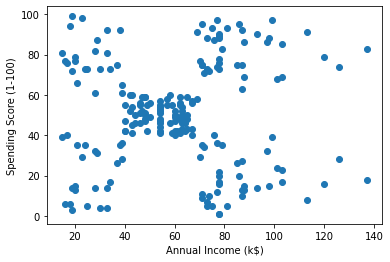

In [4]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()



# uzun sütun isimleri değiştirelim:

In [5]:

df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

### Unutmayın modelinize verileri basmadan önce mutlaka verilerinizi normalize etmelisiniz !

In [6]:
# Geçen dersimizde normalizasyonu biz kendimiz yapmıştık bu sefer sklearn kütüphaneis içinde bulunan 
# MinMaxScaler() fonksiyonunu kullanacağız:

scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [7]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


### Önce K Değerini Belirleyelim (Elbow Yöntemi kullanarak)

In [8]:
k_range = range(1,11)
list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['income','score']])
    list_dist.append(kmeans_modelim.inertia_)

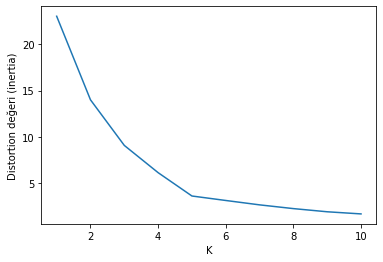

In [9]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

#### En iyi K değeri = 5

In [22]:
# K = 5 için bir K-Means modeli oluşturalım:
kmeans_modelim = KMeans(n_clusters = 7)#5 olmalı
y_predicted = kmeans_modelim.fit_predict(df[['income','score']])
y_predicted

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 3,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 5, 1, 3, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 3, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 4, 1, 4, 1, 4, 1, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6], dtype=int32)

In [23]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,0
1,2,0.000000,0.816327,2
2,3,0.008197,0.051020,0
3,4,0.008197,0.775510,2
4,5,0.016393,0.397959,0


In [24]:
# Centroidleri görelim:
kmeans_modelim.cluster_centers_   


array([[0.08792846, 0.19619666],
       [0.53586066, 0.83609694],
       [0.08792846, 0.79962894],
       [0.32695811, 0.49533888],
       [0.77622951, 0.21428571],
       [0.52711223, 0.15188383],
       [0.81733021, 0.79008746]])

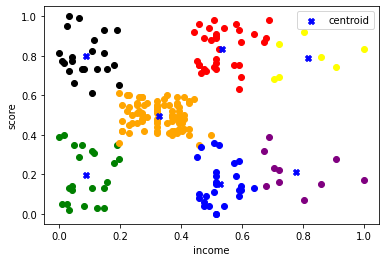

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]




plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')
plt.scatter(df6['income'],df6['score'],color='blue')
plt.scatter(df7['income'],df7['score'],color='yellow')





# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()

